In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# ✅ Load Data (In Chunks if Needed)
chunk_size = 50000
df_list = []

for chunk in pd.read_csv("C://Users//Admin//Downloads//NNDL_Datasets//job_descriptions//job_descriptions.csv", chunksize=chunk_size):
    df_list.append(chunk)

df = pd.concat(df_list, ignore_index=True)

# ✅ Use Only a Small Sample (Reduce Memory)
df_sampled = df.sample(frac=0.3, random_state=42)

# ✅ Identify Numeric and Categorical Columns
num_cols = df_sampled.select_dtypes(include=[np.number]).columns
cat_cols = df_sampled.select_dtypes(include=[object]).columns

# ✅ Convert Categorical Columns to Numeric
le = LabelEncoder()
for col in cat_cols:
    df_sampled[col] = le.fit_transform(df_sampled[col].astype(str))

# ✅ Splitting Features and Target
y = df_sampled.iloc[:, -1]  # Assuming last column is target
X = df_sampled.iloc[:, :-1]

# ✅ Convert to `float32` (Saves Memory)
X = X.astype(np.float32)

# ✅ Encode Target Variable for Classification
y = to_categorical(y)

# ✅ Reduce Data Size Further
num_samples = min(len(X), 100000)  # Use max 100,000 rows to prevent memory crash
X_train, X_test, y_train, y_test = train_test_split(
    X[:num_samples], y[:num_samples], test_size=0.2, random_state=42
)

# ✅ Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Define Neural Network Model
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))

# ✅ Compile Model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# ✅ Train Model (Use Smaller Batch Size)
model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=16, verbose=1)

# ✅ Evaluate Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Test Accuracy:", accuracy)

# ✅ Model Summary
model.summary()

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.0032 - loss: 6.3678 - val_accuracy: 0.0111 - val_loss: 5.3412
Epoch 2/50
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.0094 - loss: 5.5039 - val_accuracy: 0.0174 - val_loss: 4.8588
Epoch 3/50
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.0119 - loss: 5.1436 - val_accuracy: 0.0246 - val_loss: 4.5682
Epoch 4/50
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.0152 - loss: 4.9123 - val_accuracy: 0.0272 - val_loss: 4.3744
Epoch 5/50
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.0175 - loss: 4.7568 - val_accuracy: 0.0311 - val_loss: 4.2661
Epoch 6/50
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.0174 - loss: 4.6689 - val_accuracy: 0.0302 - val_loss: 4.2111
Epoch 7/50
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.0201 - loss: 4.6199 - val_accuracy: 0.0366 - val_loss: 4.1330
Epoch 8/50
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.0215 - loss: 4

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 885)                 │          57,525 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 207,713 (811.38 KB)

 Trainable params: 69,109 (269.96 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 138,220 (539.93 KB)

In [3]:
# ✅ Train Model with Smaller Batch Size to Reduce Memory Load
history = model.fit(
    X_train, y_train,
    batch_size=16,  # Reduced from 64 to prevent memory errors
    epochs=100,  
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 30s 6ms/step - accuracy: 0.0325 - loss: 4.2522 - val_accuracy: 0.0530 - val_loss: 3.7745
Epoch 2/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.0303 - loss: 4.2425 - val_accuracy: 0.0504 - val_loss: 3.7551
Epoch 3/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.0316 - loss: 4.2315 - val_accuracy: 0.0527 - val_loss: 3.7733
Epoch 4/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - accuracy: 0.0316 - loss: 4.2274 - val_accuracy: 0.0510 - val_loss: 3.7886
Epoch 5/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.0323 - loss: 4.2355 - val_accuracy: 0.0525 - val_loss: 3.7765
Epoch 6/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.0317 - loss: 4.2311 - val_accuracy: 0.0537 - val_loss: 3.7519
Epoch 7/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.0331 - loss: 4.2295 - val_accuracy: 0.0518 - val_loss: 3.7495
Epoch 8/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.0302 -

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



5000/5000 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.0376 - loss: 4.1519 - val_accuracy: 0.0567 - val_loss: 3.7034
Epoch 84/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - accuracy: 0.0368 - loss: 4.1556 - val_accuracy: 0.0569 - val_loss: 3.7022
Epoch 89/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.0369 - loss: 4.1519 - val_accuracy: 0.0567 - val_loss: 3.6966
Epoch 90/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.0369 - loss: 4.1536 - val_accuracy: 0.0566 - val_loss: 3.7116
Epoch 91/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.0363 - loss: 4.1458 - val_accuracy: 0.0571 - val_loss: 3.6983
Epoch 92/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.0378 - loss: 4.1458 - val_accuracy: 0.0553 - val_loss: 3.7047
Epoch 93/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.0378 - loss: 4.1474 - val_accuracy: 0.0564 - val_loss: 3.7008
Epoch 94/100
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.0364 - loss

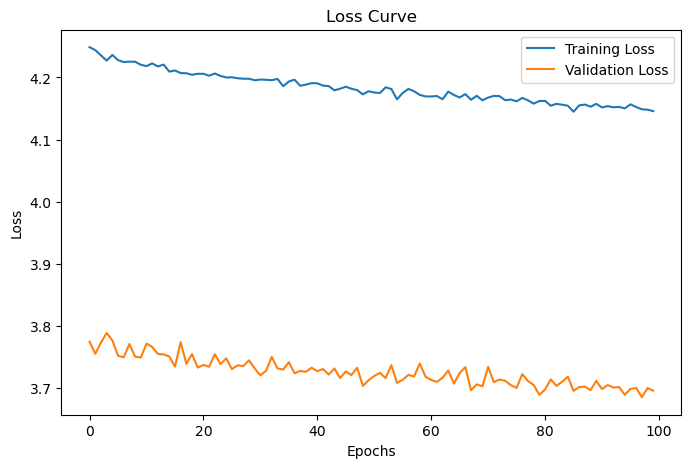

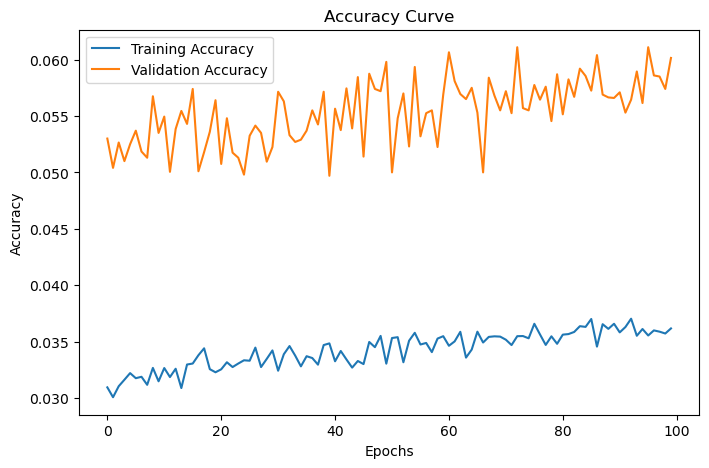

In [5]:
import matplotlib.pyplot as plt

# ✅ Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()

# ✅ Plot Accuracy Curve
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

In [7]:
# ✅ Evaluate the model on a smaller test set (first 100 samples)
score = model.evaluate(X_test[:100], y_test[:100], verbose=1)

# ✅ Print the accuracy
print(f"\nKeras CNN binary accuracy: {score[1]:.4f}\n")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0215 - loss: 3.7389

Keras CNN binary accuracy: 0.0200



In [9]:
# ✅ Extract filters and biases from the first Conv2D layer
filters, biases = model.layers[0].get_weights()

# ✅ Print filter shape for debugging
print("Filter shape:", filters.shape)  # Expected shape: (filter_height, filter_width, input_channels, num_filters)

# ✅ Ensure filters are 4D before proceeding
if len(filters.shape) == 4:
    num_filters = filters.shape[-1]  # Last dimension is the number of filters
    
    # ✅ Normalize filter values for better visualization
    filters_min, filters_max = filters.min(), filters.max()
    filters = (filters - filters_min) / (filters_max - filters_min)

    # ✅ Plot first 5 filters
    for i in range(min(5, num_filters)):  # Avoid out-of-range errors
        plt.imshow(filters[:, :, 0, i], cmap='gray')  # First channel of each filter
        plt.title(f"Filter {i+1}")
        plt.colorbar()
        plt.show()
else:
    print("Error: Filters do not have the expected 4D shape. The layer may not be Conv2D.")


Filter shape: (22, 128)
Error: Filters do not have the expected 4D shape. The layer may not be Conv2D.


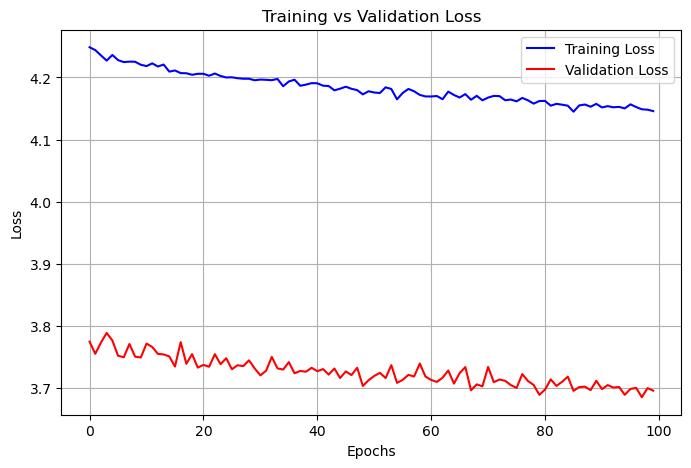

In [11]:
import matplotlib.pyplot as plt

# ✅ Plot Training & Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ✅ Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, test_Y_one_hot, verbose=1)

# ✅ Print the test results
print(f"\n🔹 Test Loss: {test_loss:.4f}")
print(f"🔹 Test Accuracy: {test_accuracy:.4f}")

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# ✅ Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_true = np.argmax(test_Y_one_hot, axis=1)  # Convert ground truth to labels

# ✅ Print classification report
print("\n🔹 Classification Report:")
print(classification_report(y_true, y_pred_classes))

# ✅ Compute and plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [21]:
from tensorflow.keras.utils import to_categorical

# ✅ Convert y_test to one-hot encoding if not already done
num_classes = len(np.unique(y_test))  # Number of classes
test_Y_one_hot = to_categorical(y_test, num_classes=num_classes)  # Ensure correct encoding


In [31]:
import numpy as np

X_test_np = np.array(X_test)
test_Y_one_hot_np = np.array(test_Y_one_hot)

print("X_test shape:", X_test_np.shape)
print("test_Y_one_hot shape:", test_Y_one_hot_np.shape)
test_loss, test_accuracy = model.evaluate(X_test_np, test_Y_one_hot_np, verbose=1)
print(f"\n🔹 Test Loss: {test_loss:.4f}")
print(f"🔹 Test Accuracy: {test_accuracy:.4f}")


X_test shape: (20000, 22)
test_Y_one_hot shape: (20000, 885, 2)


ValueError: Cannot take the length of shape with unknown rank.

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

# Define input dimensions (for example, 28x28 grayscale images)
input_shape = (28, 28, 1)  # Adjust according to your data
num_classes = 10  # Adjust based on the number of classes in your dataset

model = Sequential([
    # First convolution block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape, name='conv1'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Second convolution block
    Conv2D(64, (3, 3), activation='relu', padding='same', name='conv3'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', name='conv4'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # Fully connected block
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary to verify the architecture
model.summary()


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3 (Conv2D)                       │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv4 (Conv2D)                       │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,677,034 (6.40 MB)

 Trainable params: 1,676,650 (6.40 MB)

 Non-trainable params: 384 (1.50 KB)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Assume you already have a trained CNN model and a test image.
# For example, test_image should have shape (height, width, channels)
# Here we assume test_image is preprocessed and expanded to shape (1, H, W, C)
# If your model was trained on grayscale images of size 28x28, you might do:
# test_image = test_image.reshape(1, 28, 28, 1)

# --- Create a model that outputs the activations of all convolutional layers ---
layer_outputs = []  # list to hold the outputs of the conv layers
layer_names = []    # list to hold the names of the conv layers

for layer in model.layers:
    # Check if the layer is a Conv2D layer
    if 'conv' in layer.name:
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

activation_model = Model(inputs=model.input, outputs=layer_outputs)

# --- Get the feature maps for the input image ---
activations = activation_model.predict(test_image)

# --- Visualize the feature maps ---
for layer_name, feature_maps in zip(layer_names, activations):
    n_features = feature_maps.shape[-1]  # number of feature maps in this layer
    size = feature_maps.shape[1]  # width/height of the feature map (assumed square)

    # Create a grid for visualization: we'll display 8 maps per row
    n_cols = 8
    n_rows = n_features // n_cols + int(n_features % n_cols != 0)
    
    display_grid = np.zeros((n_rows * size, n_cols * size))
    
    for i in range(n_features):
        # Extract the feature map
        feature_map = feature_maps[0, :, :, i]
        # Normalize the feature map for better visualization
        feature_map -= feature_map.mean()
        feature_map /= (feature_map.std() + 1e-5)
        feature_map *= 64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255).astype('uint8')
        
        row = i // n_cols
        col = i % n_cols
        display_grid[row * size : (row + 1) * size,
                     col * size : (col + 1) * size] = feature_map

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()



AttributeError: The layer sequential_1 has never been called and thus has no defined input.